In [1]:
% matplotlib inline

In [2]:
import numpy as np
import pylab as pl
import random
import matplotlib 
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import tree 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.svm import SVC
#%matplotlib inline

# About

<b>Question :  If you were to draw a line, which line would you choose to draw so as to accurately classify the two binary linearly separable classes? and Why? Hint: Margin. </b> 

<img src='./images/svm1.png'> 

Concept of Margin. SVM follows this intuition and hence is called a maximum margin classifer.

<img src='./images/svm2.png'>   <img src='./images/svmmargin.png'>

<b>Question - how does maximum margin concept help with accuracy </b>

This has to do with overfitting (variance) vs underfitting (bias). The primary reason for having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

<b>Question - How does SVM finds this margin. What is Support Vector and what is Hyperplane? </b>

In order to identify this margin, SVM follows the following routes :

1.  SVM searches for the closest points, which it calls the "support vectors" . The name "support vector machine" is due to the fact that these points are like vectors and that the line is "supported by" the closest points. 

<img src='./images/svmhow.png'> 

2. The SVM draws a line connecting the support vectors (see the line labeled 'w' in Figure 2). It draws this connecting line by doing vector subtraction (point A - point B). The SVM declares the best separating line to be the line that bisects and is perpendicular to the connecting line. This is defined mathematically below.

<img src='./images/svm3.png'> 
<img src='./images/nonlinear.png'> 

In 2 dimensions - Line.

In 3 dimensions - Plane.

In m dimensions - Hyperplane with m-1 dimension.



Thus,  Support Vector Machine (SVM) is primarily a classier method that performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. However,  Support Vector Machine can be applied to regression problems.

<b>Reiterate the Basic Intuition behind SVM:</b> 
SVM focus  on support vectors (the data points that are the most difficult to tell apart), whereas other classifiers pay attention to all of the points. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

<b>Reason:</b> 
If a classifier/regressor is good at the most challenging comparisons, then the classifier will be even better at the easy comparisons. When you get a new sample (new points), it is less likely to get misclassified as SVM has already made a line that keeps the most challenging classes as far away from each other as possible, and so it is less likely that one will spillover across the line into the other's territory. 


<b>Mathematically</b>

For the linearly separable case, any point $\mathbf{x}$ lying on the separating hyperplane satisfies the equation:

$\mathbf{x}^T\mathbf{\theta} + b = 0$ , 

where $\mathbf{w}$ is the vector normal to the hyperplane and $b$ is a constant that describes how much plane is shifted relative to the origin. 

The SVM should do two things a. maximize the margin (the distance between the two hyperplanes - the positive and negative hyperplanes -that are passing through nearest support vectors) , and b. Ensure that classification is correct using constraints. The positive and negative hyperplanes are parallel to the decision boundary. These hyperplanes are mathematically defined as : 

$\mathbf{x}_{negative}^T\mathbf{\theta} + b = -1$ 

and 

$\mathbf{x}_{positive}^T\mathbf{\theta} + b = 1$ 


This margin distance between these two hyperplanes is equal to  $$\frac{2}{\|\mathbf{\theta}\|}$$ 

This means that the objective is to solve $$\underset{\mathbf{\theta}}{\operatorname{max}} \frac{2}{\|\mathbf{\theta}\|}$$

Equivalently we want $$\underset{\mathbf{\theta}}{\operatorname{min}} \frac{\|\mathbf{\theta}\|}{2}$$

<img src='./images/svmclass.png'> 

<b>How do we get to to the objective equation :</b> 
  
If we subtract the two linear equations representing the hyperplane from each other, we get:

$$\theta^T \left( x_{positive}-x_{negative} \right) = 2$$

Normalizing by $$\Vert \theta \Vert = \sum_{j=1}^m \theta_j^2$$ on both sides by summing over 'm' number of support vector points. we get the equation,

$$\frac {\theta^T \left( x_{positive}-x_{negative} \right)} {\Vert \theta \Vert} = \frac {2} {\Vert \theta \Vert}$$

The LHS of the equation below can then be interpreted as the distance between the positive and negative hyperplane, which is the margin that we want to maximize. 

Now the objective function of the SVM becomes the maximization of this margin 
$$2 \Vert \theta \Vert$$
with the constraint of the samples being classified correctly. 
In other words, all negative samples should fall on one side of the negative hyperplane while all the positive samples should fall behind the positive hyperplane. The constraints are mathematically defined as :

$$b +\theta^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1 \\ \lt -1 & \quad if \; y^{(i)}=-1 \end{cases}$$

$$y^{(i)} \left ( b+\theta^Tx^{(i)} \right ) \ge 1 \quad \forall i$$

These equations are solved to obtain the support vectors and the weights.

and final prediction is done by using
$$y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{\theta^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{\theta^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.$$

The maximal margin classifier is a very natural way to perform classification, if a separating hyper plane exists. However, in most real-life cases no separating hyper plane exists, and so there is no maximal margin classifier.

<b> The reason for introducing the slack variable $$ξ$$ </b>

<img src='./images/svmslack.png'> 

Assuming the classes overlap in the given feature space. One way to deal with the overlap is to still maximize M, but allow for some points to be on the wrong side of the margin. In order to allow these, we can define the slack variables as, $$\xi = ( \xi_1, \xi_2 \ldots \xi_m)$$ . In such circumstances, the linear constraints need to be relaxed for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization.

The slack variable simply can be added to the linear constraints:

$$\theta^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1-\xi^{(i)} \\ \lt -1 & \quad if \; y^{(i)}=-1 +\xi^{(i)}\end{cases}$$

So, the new objective to be minimized becomes:

$${\Vert \theta \Vert}^2 + C \left ( \sum_i \xi^{(i)} \right )$$


With the variable C, we can penalize for misclassification. We can then use the parameter C to control the width of the margin and therefore tune the bias-variance trade-off.

Large values of C correspond to large error penalties . With smaller values of C, we are less strict about misclassification errors.

 
<b>Kernal Trick </b>

What is a kernel and what is the need for it?
https://dscm.quora.com/The-Kernel-Trick
http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/
For non-linear separable data. 

Two options to separate the dataset -

<img src='./images/nonlineartrans.png'> 

A. Transform the boundary surface - Ditch the hyperplane and go to non-linear curved surfaces in the original dimension. 

B. Either transform the dataset to higher dimension where they are separable using a hyperplane.
   -  linear is simpler.
 


A dataset that is not linearly separable in lower dimensions (original feature space dimension) may be linearly separable in a higher-dimensional space. Thus, if we have a transformation that lifts the dataset to a higher-dimensional such that it is linearly separable, then we can train a linear SVM on  to find a decision boundary that separates the classes in the higher dimension. Projecting the decision boundary  found in higher dimension  back to the original space  will yield a nonlinear decision boundary. This means that we can learn nonlinear SVMs while still using the original Linear SVM
formulation. Example :

<img src='./images/3.png'> 



However , transforming from lower dimensional to higher dimensional incurs serious computational and memory problems.

The kernel trick offers a solution.

It turns out that there exist function K(v,w) that, given two vectors v and w in lower dimensions,  implicitly computes the dot product between v and w in a higher-dimensional without explicitly transforming v and w to higher dimensions . That is we do not need to know the functions F(v) and F(w) and the dimensionality and only knowing function K would do. Such functions are called kernel  functions. Added advantage - we do not need to know to what dimension to transform it to or the form of mapping function.

Example :

<img src='./images/ktexplain.png'> 

<img src='./images/ktexplain2.png'> 

How it is used in SVM and Machine learning?

In above example, Kernel trick involve a kernel function that would compute the dot product in the original space and raise the result (a scalar) to a power. For a Gaussian kernel function -  all the computation we have to do is find the squared Euclidean distance between xi and xj, and find its exponential (the computations happens in the original space). the result is equivalent to transforming a feature vector into infinite dimensions, without actually going there.

In SVM, the dot products in machine learning formulae are replaced by kernel functions. The objective function becomes :


The implications are: By using a kernel, we can implicitly transform datasets to a higher-dimensional using no extra memory, and with a minimal effect on computation time. The only effect on computation is the extra time required to compute the kernel. Depending on kernel function chosen, this can be minimal. By virtue of kernel trick, we can efficiently  learn nonlinear decision boundaries for SVMs simply by replacing all dot products in the SVM computation with kernel function. 

Various types of kernals
<img src='./images/kernals.png'> 

<b>Advantages and Disadvantages of SVM:</b>

<b>Advantages</b>

Control over Generalization Ability of algorithm through placement of hyperplane
Avoid difficulties of using linear functions in the high dimensional feature
Accuracy
Works well on smaller cleaner datasets
It can be more efficient because it uses a subset of training points


<b>Disadvantages</b>
Computaional cost is prohibhitive with larger datasets as the training time with SVMs can be high
It can be less effective on noisier datasets with overlapping classes


<b>Parameters:</b>

C :  Penalty parameter C of the error term.

epsilon : Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

kernel :  Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

degree : Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

coef0 : Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.


tol :  Tolerance for stopping criterion.



<b>Popular parameter-tuning technique:</b>
 
 K Fold cross-validation
 
 
 
<b>Examples</b>
 
<b> Simple Example - Iris Classification</b>
 
 
 Real Industrial Regression Example at SINTEF
 
 
 Real Industrial Classification Example at SINTEF 

In [ ]:
#Influence of Kernal  Linear vs RBF (Accuracy mentioned in figure)


Linear below

#<img src='./images/decisionboundarylinear1.png'> 

RBF below
#<img src='./images/decisionboundarygamma1.4.png'>


Influence of parameter C 
C=0.1
#<img src='./images/decisionboundary0.1.png'>  
C=1
#<img src='./images/decisionboundary1.png'> 
C=100
#<img src='./images/decisionboundary100.png'>
C=1000
#<img src='./images/decisionboundary1000.png'> 



Influence of parameter Gamma 
gamma=0.1
#<img src='./images/decisionboundarygamma0.1.png'>

gamma=1.4
#<img src='./images/decisionboundarygamma1.4.png'>

gamma=1e-05
#<img src='./images/decisionboundarygamma1e-05.png'>

gamma=1000
#<img src='./images/decisionboundarygamma1000.png'>


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#print(S300099new_scaled.mean(axis=0))
#print(S300099new_scaled.std(axis=0))


data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

#X = preprocessing.scale(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

##Check for skewness/balanced dataset
y1c=[1 if 0<value else 0 for value in Y]
print(len(y1c))
print(y1c.count(1))
print('percent of class 1', y1c.count(1)/len(y1c)*100)

X=X_train
Y=Y_train

y1ctest=[1 if 0<value else 0 for value in Y_test]
print(len(y1ctest))
print(y1ctest.count(1))
print('TEST CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

y1ctest=[1 if 0<value else 0 for value in Y_train]
print(len(y1ctest))
print(y1ctest.count(1))
print('TRAIN CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

118
58
percent of class 1 49.152542372881356
36
17
TEST CASE - percent of class 1 47.22222222222222
82
41
TRAIN CASE - percent of class 1 50.0


In [4]:
def prettyPicture(clf, X_test, y_test,index):
    #x_min = 0.0; x_max = 1.0
    #y_min = 0.0; y_max = 1.0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig=plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z)#, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "r", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "b", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right',color='green')
    plt.show()
#    flaga = 'decisionboundarylinear %s' % str(index)
#    print(flag)
#    plt.savefig(flaga + '.png',box_inches='tight')
       
#    plt.close()

# Explore the other hyperparameters

DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


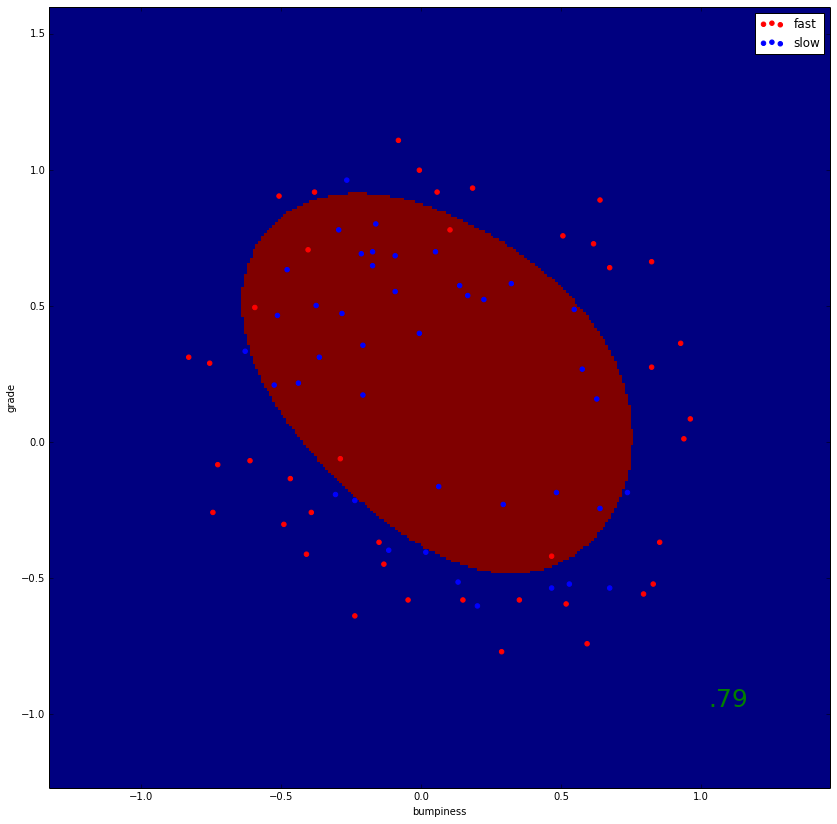

0.77777777777777779

In [5]:
from sklearn import datasets, svm, pipeline
clf=svm.SVC(kernel='rbf',C=1, gamma=1.4)
C=1
clf.fit(X,Y)
prettyPicture(clf, X, Y,C);
y_predict=clf.predict(X_test)
accuracy_score(Y_test,y_predict)

In [6]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train,y_test):
    #print (estimator,tuned_parameters,cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The accuracy scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(accuracy_score(y_true, y_pred))
    print()
    return clf

In [7]:
def plot_learning_curve(estimator,outfile,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
#    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)




 

In [8]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

In [9]:
# function takes a model parameter and a ranger and produces a plot and dataframe of CV scores for the parameter values
def evaluate_param(parameter, num_range, index,clf,y_train):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(X_train, y_train) #features
    
    df = {}
#    grid_search.cv
#    for i, score in enumerate(grid_search.grid_scores_):
#        df[score[0][parameter]] = score[1]
 
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    print('means',means,num_range)
#from operator import itemgetter
#paramvalues=map(itemgetter(1),grid_search.cv_results_['params'])
#print('paramvalues',paramvalues)
#grid_search.cv_results_['params'].values()))
#    prettyPicture(grid_search.best_estimator_, X, Y,index);
    
#    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    plt.subplot(2,1,index)

#    if index==1:
#        num_range=range(len(num_range))
#        plot = plt.plot(num_range,means)
    
    plot = plt.plot(num_range,means)
    
    plt.title(parameter)
    
    maxi = means.argmax(); maxmean = means[maxi]; parmax=num_range[maxi]  
    print('maximum',maxmean,parmax)
    plt.show()
#    print('index',index)
    return plot
#    df = pd.DataFrame.from_dict(df, orient='index')
#    df.reset_index(level=0, inplace=True)
#    df = df.sort_values(by='index')

means [ 0.59756098  0.79268293  0.80487805  0.76829268  0.64634146] [0.1, 1, 1.4, 10, 100]
maximum 0.80487804878 1.4


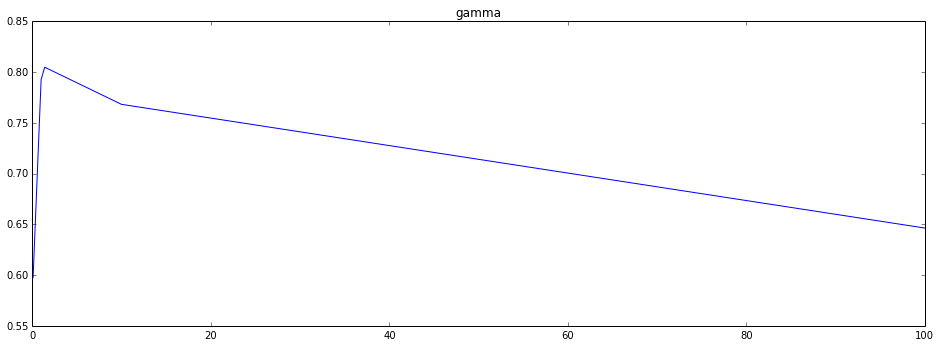

means [ 0.67073171  0.73170732  0.81707317  0.81707317  0.7804878   0.81707317
  0.81707317  0.81707317  0.81707317  0.81707317  0.82926829  0.82926829
  0.82926829  0.81707317  0.81707317  0.81707317] [0.1, 1, 5, 10, 100, 960, 1000, 1100, 1200, 1250, 1300, 1500, 1700, 2000, 2500, 3000]
maximum 0.829268292683 1300


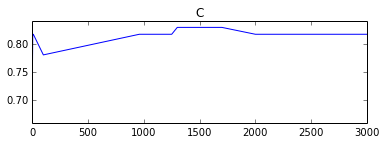

In [10]:
#ESTIMATE ONE PARAMETER AT A TIME 
from sklearn.model_selection import GridSearchCV
svra=svm.SVC(kernel='rbf') #kernel='rbf',C=1e3, gamma=0.1
#param_gridrf={"C":np.arange(0.1,1000,20),"gamma": np.arange(0.001,1000,0.1)}
param_gridrf={"C":[0.1,1,5,10,100,960,1000,1100,1200,1250,1300,1500,1700,2000,2500,3000],"gamma": [0.1,1,1.4,10,100]}

y_t=Y

#print('trainsize',X_train.shape)

#from sklearn.utils import shuffle
#X_train,y_t = shuffle(X_train,y_t)

#print('trainsize',y_t.shape) 
index = 1
count = 1 
plt.figure(figsize=(16,12)) 
for parameter, param_range in dict.items(param_gridrf):
    evaluate_param(parameter, param_range, index,svra,y_t)
    index += 1 
#    print('index')
    import matplotlib.pylab as pylab 
#    params = {'legend.fontsize': 'small',
      #'figure.figsize': (15, 5),
#     'axes.labelsize': 'small',
#     'axes.titlesize':'small',
#     'xtick.labelsize':'small',
#     'ytick.labelsize':'small'}
#    pylab.rcParams.update(params) 
#    plt.rcParams['font.size']=24
#    plt.rcParams['axes.labelsize']=24 

#    flag = 'performance %s' % str(index)

#    plt.savefig(flag + '.png',box_inches='tight')
#    plt.show()
    
# GAMMA - maximum 0.80487804878 1.401
#  C - maximum 0.817073170732 960.1

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


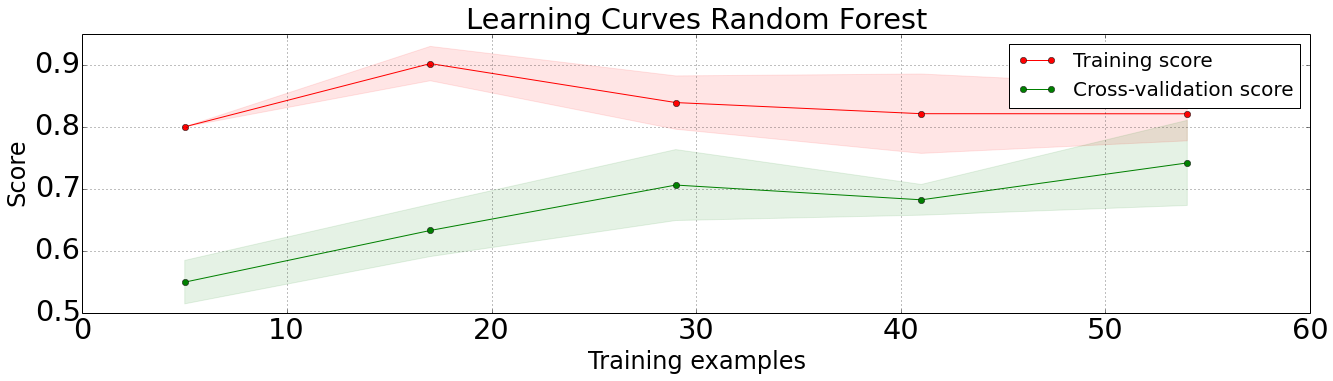

In [11]:
from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves Random Forest"
out_file1=('RFFitLC.pdf')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

In [13]:
param_gridrf={'kernel':('linear', 'rbf'),"C":np.arange(1e-05,2200,100),"gamma": np.arange(0.0,2,0.2)}

grid_cv2=hypertune(clf,param_gridrf,3,X_train,Y_train,Y_test)

predicted2 = grid_cv2.best_estimator_.predict(X_test)

#title = "Learning Curves GB" 
#out_file1=('GBFitLC.pdf') 
#plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv2.bestestimator,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1) GBTS=train_sizes GBTSco=train_scores GBTeSco=test_scores





Coefficients based on fit:


Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.80000000000000004, 'C': 1.0000000000000001e-05}

Grid scores on development set:

0.476 (+/-0.149) for {'kernel': 'linear', 'gamma': 0.0, 'C': 1.0000000000000001e-05}
0.500 (+/-0.000) for {'kernel': 'rbf', 'gamma': 0.0, 'C': 1.0000000000000001e-05}
0.476 (+/-0.149) for {'kernel': 'linear', 'gamma': 0.20000000000000001, 'C': 1.0000000000000001e-05}
0.488 (+/-0.123) for {'kernel': 'rbf', 'gamma': 0.20000000000000001, 'C': 1.0000000000000001e-05}
0.476 (+/-0.149) for {'kernel': 'linear', 'gamma': 0.40000000000000002, 'C': 1.0000000000000001e-05}
0.512 (+/-0.137) for {'kernel': 'rbf', 'gamma': 0.40000000000000002, 'C': 1.0000000000000001e-05}
0.476 (+/-0.149) for {'kernel': 'linear', 'gamma': 0.60000000000000009, 'C': 1.0000000000000001e-05}
0.512 (+/-0.137) for {'kernel': 'rbf', 'gamma': 0.60000000000000009, 'C': 1.0000000000000001e-05}
0.476 (+/-0.149) for {'kernel': 'linear', 'gamma'